In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

In [22]:
df = pd.read_csv("../IT/2020-03-29_IT_IT_normal.csv")
df.set_index(['state', 'county', 'category'], inplace=True)


In [23]:
# df.xs('workplace', axis=0, level=2, drop_level=False)
# df.query('county == "Overall"')

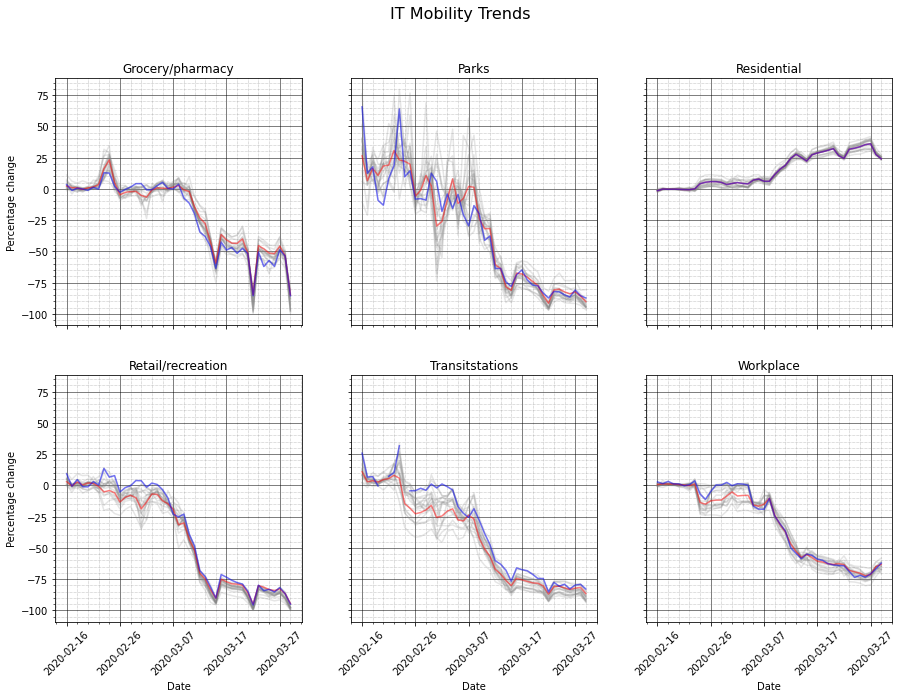

In [24]:
state = df.index.unique(level='state')
categories = df.index.unique(level='category')
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))

fig.suptitle(f'{state[0]} Mobility Trends', fontsize=16)

for ax, cat in zip(chain.from_iterable(axes), categories):
    df.query(f'category == "{cat}" &  county != "Overall"').T.plot(
        ax=ax,color="gray",
        alpha=0.2,
        legend=False,
        rot=45
    )
    df.query(f'category == "{cat}" &  county == "Overall"').T.plot(
        ax=ax,color="red",
        alpha=0.5,
        legend=False,
        rot=45
    )
    df.query(f'category == "{cat}" &  county == "Molise"').T.plot(
        ax=ax,color="blue",
        alpha=0.5,
        legend=False,
        rot=45
    )
    ax.set_title(f'{cat.capitalize()}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage change')
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.savefig(f'{state[0]}_plot.png', dpi=300)

In [6]:
df2 = pd.read_csv('../data/2020-03-29/GB/2020-03-29_GB_GB_normal.csv')
df2

,state,county,category,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
0,GB,Aberdeen City,grocery/pharmacy,0.169,NaN,-0.320,-2.067,2.981,-1.404,0.732,...,7.160,0.732,-15.557,-14.927,-26.840,-26.718,-29.493,-29.622,-37.746,-42.783
1,GB,Aberdeen City,parks,-13.758,25.253,27.174,9.470,-1.510,-10.549,NaN,...,-9.230,-13.021,-5.896,-33.144,-31.703,-25.703,-16.606,-29.008,-56.818,-48.153
2,GB,Aberdeen City,residential,-0.556,1.229,1.120,1.652,0.228,0.631,0.589,...,13.345,11.226,8.514,18.988,25.168,28.541,29.636,30.797,NaN,NaN
3,GB,Aberdeen City,retail/recreation,6.577,11.301,5.281,2.406,-0.841,-0.082,0.209,...,-36.467,-59.195,-62.267,-55.160,-77.659,-81.709,-83.053,-83.235,-90.222,-89.210
4,GB,Aberdeen City,transitstations,4.112,2.381,1.180,3.762,-0.560,-3.047,3.064,...,-35.738,-46.339,-46.144,-52.976,-61.969,-65.394,-70.004,-72.030,-76.210,-75.841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,GB,West Yorkshire,parks,-31.808,6.087,-4.704,-9.071,-19.819,-25.909,-18.240,...,5.949,3.796,28.017,5.043,-5.880,0.585,4.456,-20.357,-50.924,-51.188
240,GB,West Yorkshire,residential,0.797,2.875,2.772,2.987,3.370,3.587,0.557,...,11.688,10.414,8.136,17.224,23.506,26.330,27.176,28.818,20.219,15.864
241,GB,West Yorkshire,retail/recreation,-1.876,7.795,5.689,5.102,3.005,5.232,-1.882,...,-23.184,-50.067,-55.983,-46.370,-72.811,-75.559,-76.111,-77.622,-86.309,-87.815
242,GB,West Yorkshire,transitstations,-2.041,-2.385,-5.430,-4.707,-7.434,-2.494,2.925,...,-37.552,-45.395,-41.791,-53.464,-66.844,-70.105,-72.185,-73.650,-77.452,-76.778


In [19]:
codes_to_names = pd.read_csv("../codes_to_names.csv")
codes_to_names

,ISO_code,Name
0,AF,Afghanistan
1,AO,Angola
2,AG,Antigua and Barbuda
3,AR,Argentina
4,AW,Aruba
...,...,...
124,VE,Venezuela
125,VN,Vietnam
126,YE,Yemen
127,ZM,Zambia
